In [1]:
import numpy as np
np.set_printoptions(legacy='1.25')
import matplotlib.pyplot as plt
import scipy as sp
from ipywidgets import interact, FloatSlider

/tmp/ipykernel_195899/1508371696.py:2: UserWarning: legacy printing option can currently only be '1.13', '1.21', or `False`
  np.set_printoptions(legacy='1.25')


###Ejercicio 7.
Campo vector definido por:
$$ \dot{x} = rx - \frac{x}{1+x}, $$

cuyos puntos fijos están dados por $x^* = \lbrace 0, \frac{1}{r} - 1 \rbrace$. El 0 es PF para todo $r$, mientras que el otro sólo para $r \neq 0$. Observar que la función no es continua en $x=-1$.

In [2]:
def campovector(x, r):
  return r*x - x/(1+x)

def campovectorprima(x, r):
  return r - 1/(1+x)**2

In [3]:
@interact(r=FloatSlider(min=-5, max=5, step=0.01, value=0))
def plot_campovector_interactive(r):
    x = np.arange(-3.5, 1.5, 0.01)
    y = campovector(x, r)
    plt.figure(figsize=(6,5))
    plt.plot(x, y, label=f'r = {r}')
    plt.xlabel('$x$', fontsize=18)
    plt.ylabel(r'$\dot{x}$', fontsize=18)
    plt.ylim(-6, 6)
    plt.hlines(0, xmin=x.min(), xmax=x.max(), colors='k', ls='-', lw=1)
    plt.legend()
    plt.grid(True)
    plt.show()

#plot_campovector_interactive()

interactive(children=(FloatSlider(value=0.0, description='r', max=5.0, min=-5.0, step=0.01), Output()), _dom_c…

In [4]:
r = 2
puntosfijos = [0, 1/r - 1]

x = np.arange(-3.5, 1.5, 0.01)
y = campovector(x, r)

In [5]:
pendientes = []
estabilidad = []
for p in puntosfijos:
    pendientes.append(campovectorprima(p, r))
    estabilidad.append(int(campovectorprima(p, r) < 0))
ordenadas = -np.array(pendientes)*np.array(puntosfijos)

<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_195899/3436028832.py:8: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel('$f(x), \dot{x}$', fontsize=18)


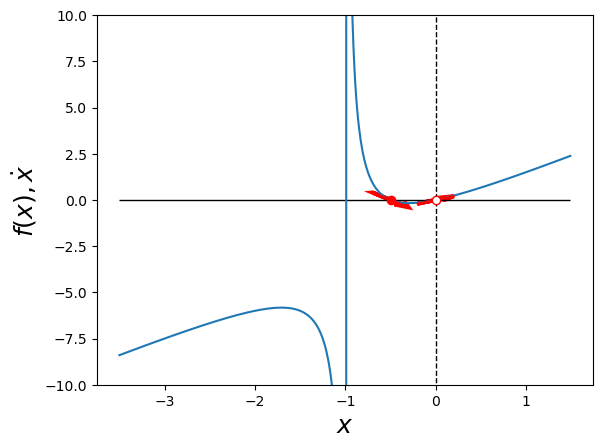

In [6]:
markerfcolors = ['w', 'r']
markerecolors = ['r', 'r']
plt.vlines(0, ymin=y.min(), ymax=y.max(), colors='k', ls='--', lw=1)
plt.hlines(0, xmin=x.min(), xmax=x.max(), colors='k', ls='-', lw=1)
plt.plot(x, y)
plt.gca().set_ylim([-10, 10])
plt.xlabel('$x$', fontsize=18)
plt.ylabel('$f(x), \dot{x}$', fontsize=18)
for p in np.arange(len(puntosfijos)):
    epsilon = 0.2
    n = 10
    x_tmp = np.linspace(puntosfijos[p]-epsilon, puntosfijos[p]+epsilon, n)
    y_tmp = pendientes[p]*x_tmp+ordenadas[p]
    plt.plot(x_tmp, y_tmp, 'r')
    plt.arrow(x_tmp[-10], y_tmp[-10], x_tmp[-1]-x_tmp[-10], y_tmp[-1]-y_tmp[-10],
              shape = 'full', color='r', lw=3, length_includes_head=True, head_width=0.14)
    plt.plot(puntosfijos[p], 0, marker='o',
             markerfacecolor=markerfcolors[estabilidad[p]], markeredgecolor=markerecolors[estabilidad[p]])
plt.show()

<>:23: SyntaxWarning: invalid escape sequence '\d'
<>:23: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_195899/44550502.py:23: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel('$f(x), \dot{x}$', fontsize=18)


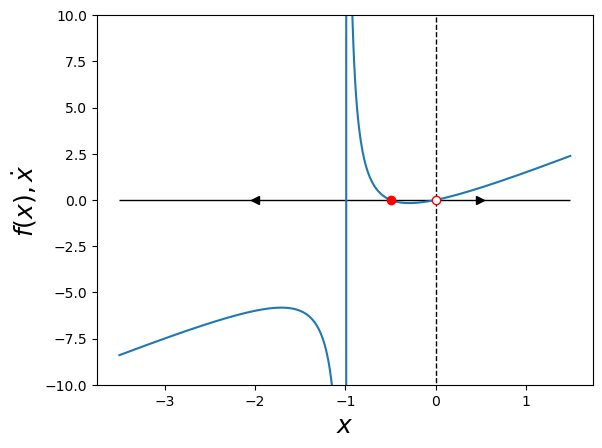

In [7]:
markerfcolors = ['w', 'r']
markerecolors = ['r', 'r']
xmarkerstyle = ['<', '>']
plt.vlines(0, ymin=y.min(), ymax=y.max(), colors='k', ls='--', lw=1)
plt.hlines(0, xmin=x.min(), xmax=x.max(), colors='k', ls='-', lw=1)
plt.plot(x, y)
plt.gca().set_ylim([-10, 10])

for p in np.arange(len(puntosfijos)):
    puntosfijos_sorted = np.sort(puntosfijos)
    if puntosfijos_sorted[p] == puntosfijos_sorted.min():
        x_markers_tmp = [x[0]+(puntosfijos_sorted[p]-x[0])/2]
    elif puntosfijos_sorted[p] == puntosfijos_sorted.max():
        x_markers_tmp = [x[-1]-(x[-1]-puntosfijos[p])/2]
    else:
        x_markers_tmp = [puntosfijos_sorted[p]-(puntosfijos_sorted[p]-puntosfijos_sorted[p-1])/2,
                        puntosfijos_sorted[p]+(puntosfijos_sorted[p+1]-puntosfijos_sorted[p])/2]
    plt.plot(puntosfijos[p], 0, marker='o',
             markerfacecolor=markerfcolors[estabilidad[p]], markeredgecolor=markerecolors[estabilidad[p]])
    for i in np.arange(len(x_markers_tmp)):
        plt.plot(x_markers_tmp[i], 0, c='k', marker=xmarkerstyle[int(campovector(x_markers_tmp[i], r) > 0)])
plt.xlabel('$x$', fontsize=18)
plt.ylabel('$f(x), \dot{x}$', fontsize=18)
plt.show()

In [8]:
def root_finder_clean(f, x, N=20, round=2, seed=0, criterio = 1E-4, max_iter=100):
    '''
    Búsqueda de raíces por el método de la secante (fprime en sp.optimize.newton = None)
    '''
    if seed is not None:
        np.random.seed(seed)
    condiciones_iniciales = np.random.choice(x, size=N)
    soluciones = []
    for c in condiciones_iniciales:
        try:
            sol = sp.optimize.newton(f, fprime=None, x0=c, tol = 0.0001, maxiter=max_iter, disp=False)
            soluciones.append(sol)
        except RuntimeError:
            pass
    PF = np.unique(np.array(soluciones).round(round))
    #return PF[abs(f(PF)) < criterio]
    if all(abs(f(PF))<criterio):
      return PF
    else:
      return False

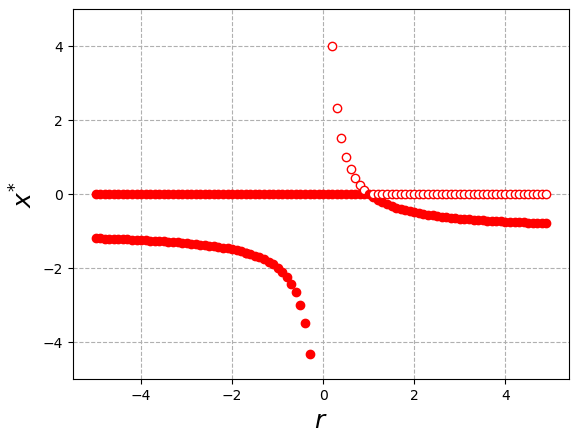

In [9]:
markerfcolors = ['w', 'r']
markerecolors = ['r', 'r']
N = 20
rs = np.arange(-5, 5, 0.1)

for r in rs:
    max_iter = 100
    round = 2
    def campovector_r(x):
        return campovector(x, r)
    puntosfijos = root_finder_clean(campovector_r, x, N=N)
    while isinstance(puntosfijos, bool) and (max_iter<= 1E4 or round <= 6):
      max_iter = max_iter*10
      round += 1
      puntosfijos = root_finder_clean(campovector_r, x, N=N, round=round, max_iter= max_iter)
    pendientes = []
    if not isinstance(puntosfijos, bool):
      for x0 in puntosfijos:
        p = campovectorprima(x0, r)
        pendientes.append(p)
        plt.plot(r, x0, 'o', markerfacecolor=markerfcolors[int(p < 0)], markeredgecolor=markerecolors[int(p < 0)])
plt.xlabel('$r$', fontsize=18)
plt.ylabel('$x^{*}$', fontsize=18)
plt.gca().set_ylim([-5, 5])
plt.grid(True, ls= '--')
plt.show()

In [10]:
@interact(r=FloatSlider(min=-5, max=0, step=0.01, value=0))
def plot_campovector_interactive(r):
  x = np.arange(-3.5, 1.5, 0.01)
  y = campovector(x, r)
  x_grilla, y_grilla = np.meshgrid(np.linspace(-2, 1, 50), np.linspace(-5, 5, 50))
  dy_grilla = campovector(x_grilla, r)
  dx_grilla = np.full(dy_grilla.shape, 0.01)

  fig, ax = plt.subplots(figsize = (8,8))
  ax.quiver(x_grilla, y_grilla, dx_grilla, dy_grilla, color = 'tab:gray', angles = 'xy', scale = 10, scale_units = 'height')#, width = 0.0025)
  ax.plot(x, y, label=f'r = {r}')
  ax.set_xlabel('x', fontsize = 15)
  ax.set_ylabel('$\dot{x}$', fontsize = 15)
  ax.set_ylim(-2, 2)
  ax.set_xlim(-2, 1)
  ax.legend()
  plt.hlines(0, xmin=x.min(), xmax=x.max(), colors='k', ls='-', lw=1)
  ax.grid(True)
  fig.show()

<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_195899/1473472931.py:13: SyntaxWarning: invalid escape sequence '\d'
  ax.set_ylabel('$\dot{x}$', fontsize = 15)


interactive(children=(FloatSlider(value=0.0, description='r', max=0.0, min=-5.0, step=0.01), Output()), _dom_c…